# Time notebook

## Global

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import bz2
import json
import numpy as np
import matplotlib.pyplot as plt

## Playing with the dates

 First as we have a  date format in the data which is difficult to use, we define a function to change it from a "yyyy-mm-dd HH:MM:SS" representation to a day of the year one (see the example below).

In [4]:
from datetime import datetime
#Get the day of the year from a "yyyy-mm-dd HH:MM:SS" format
def get_day_of_year(date):
    date_time_obj = datetime.strptime(date[2:], '%y-%m-%d %H:%M:%S')
    d = date_time_obj.strftime("%j")
    return int(d)-1

In [5]:
print(get_day_of_year("2020-12-31 12:26:24"))

365


## Distribution for each year
We want to know the distribution of quotes per day for each years. To do so we count and store the number of quotes per year and then manage to create a dictionary with these years.

In [1]:
#Helpers to get the count per day for a given year
def count_per_day(path_to_file, max_instances=-1):
    count_days = np.zeros((366))
    count = 0
    with bz2.open(path_to_file, 'rb') as s_file:
        for instance in s_file:
            if count == max_instances:
                break
            instance = json.loads(instance) # loading a sample
            date = instance['date'] # extracting the date
            idx = int(get_day_of_year(date))
            count_days[idx] +=1
            count+=1
    return count_days

In [7]:
#Gets a list of years and returns a dictionnary with each year and their corresponding

def count_per_day_dict(years, max_instances = -1):
    years_dict = {}

    for year in years:

        path_to_file = '/content/drive/MyDrive/Quotebank/quotes-{year}.json.bz2'.format(year=year)
        count_per_day_years = count_per_day(path_to_file, max_instances)

        years_dict = {**years_dict, year: count_per_day_years}
    return years_dict

If we take for example 2008 we have this: 

In [10]:
dict_2008 = count_per_day_dict(['2008'], max_instances = -1)
print(dict_2008)

{'2008': array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0

As we see, we mostly have zeros because the quotes are all registered in the second-half of the year.

The goal is to have a dictonnary with the years as keys and their respective distribuition as values. 

We would have the following code for each year:

```python
dict_year = count_per_day_dict(['year'], max_instances = -1)
```
or, if we get multiple years at the same time:
```python
dict_year1_year2 = count_per_day_dict(['year1', 'year2'], max_instances = -1)
```

As we did it on google colab and kept the dictionaries on this notebook, we have all the results from all the years. We stored in a dictionary named ```dict_years```.

To jump this cell that is pretty long, you can click <a href='#jump'>Here</a>

In [6]:
dict_2015_2016 = {'2015': [ 27200.,  36669.,  25898.,  27772.,  47947.,  56776.,  63402.,
        59885.,  61093.,  35646.,  34686.,  57767.,  63865.,  69097.,
        70365.,  65716.,  36707.,  35130.,  52221.,  63471.,  73217.,
        74270.,  67090.,  38036.,  37431.,  60202.,  65023.,  71990.,
        75102.,  69444.,  38019.,  36541.,  57522.,  65390.,  73269.,
        74641.,  68585.,  36626.,  35646.,  59651.,  68012.,  72279.,
        75542.,  69570.,  35129.,  33992.,  50549.,  61072.,  70756.,
        74095.,  69383.,  39822.,  38245.,  62844.,  69950.,  74168.,
        74947.,  70641.,  40651.,  38321.,  62912.,  71883.,  74174.,
        74139.,  66347.,  38038.,  38628.,  61234.,  68925.,  73355.,
        75679.,  68575.,  39460.,  38529.,  62228.,  70668.,  75530.,
        74129.,  70233.,  37738.,  35368.,  63152.,  70165.,  74383.,
        74796.,  68292.,  38363.,  36937.,  59283.,  66447.,  72514.,
        69757.,  55172.,  33690.,  31483.,  52156.,  63794.,  68975.,
        71889.,  65558.,  36285.,  36864.,  61194.,  68532.,  70817.,
        75218.,  67849.,  35720.,  33775.,  50994.,  50560.,  49976.,
        49064.,  49949.,  37841.,  39484.,  42901.,  44048.,  15431.,
        20825.,   1728.,    958.,    991.,   2506.,   9282.,  40550.,
        39449.,  60000.,  40014.,  39540.,  44792.,  47702.,  49536.,
        54605.,  51197.,  40657.,  37338.,  45136.,  46764.,  52644.,
        53541.,  49776.,  37453.,  37011.,  32697.,  42651.,  45748.,
        51183.,  47754.,  16076.,  16873.,   1668.,   2433.,   3139.,
         3903.,   8352.,  23576.,  22477.,  47297.,  47798.,  50165.,
        53428.,  48837.,  36030.,  37202.,  44149.,  48631.,  48462.,
        55983.,  48198.,  33197.,  31449.,  34992.,  40512.,  43866.,
        48787.,  45948.,  32659.,  28593.,  10891.,  10383.,   1670.,
         1769.,   1223.,    814.,    734.,   1843.,   2433.,   2501.,
         2912.,   2798.,   2801.,   5141.,  20867., 111678.,  97116.,
        89144.,  77547.,  47155.,  44969.,  71836.,  80223.,  79657.,
        88601.,  78306.,  43386.,  43518.,  69468.,  81452.,  88882.,
        87796.,  78825.,  45366.,  44949.,  69569.,  79485.,  83949.,
        87711.,  85394.,  44801.,  43787.,  72503.,  78412.,  79793.,
        86161.,  75076.,  47017.,  43200.,  70508.,  74056.,  74132.,
        93039.,  80031.,  45058.,  44354.,  71397.,  79750.,  83646.,
        88956.,  79822.,  47920.,  44094.,  67945.,  79690.,  85074.,
        86895.,  83101.,  45600.,  42528.,  52385.,  74691.,  84982.,
        84472.,  97022.,  47281.,  42932.,  81699.,  85103.,  91047.,
        93295.,  83297.,  45862.,  46059.,  87757.,  88844.,  88360.,
        87727.,  85278.,  46979.,  46400.,  86707.,  90895.,  92402.,
        91178.,  82360.,  44582.,  43412.,  87332.,  86499.,  90978.,
        85577.,  92745.,  50127.,  47886.,  72983.,  86137.,  97086.,
       103840.,  91075.,  50598.,  47151.,  62737., 100918.,  95983.,
        96192.,  87100.,  47906.,  45067.,  76818.,  98189.,  96974.,
       100139.,  87683.,  52589.,  54683.,  84341.,  92517.,  99959.,
        99677.,  92128.,  50105.,  48852.,  81810.,  89671.,  89464.,
        96273.,  90862.,  51197.,  46707.,  82735.,  91594.,  79134.,
         2602.,   2418.,   1174.,   1405.,  10677.,   4673.,  10311.,
        60198.,  72249.,  45694.,  64664.,  89338.,  91303.,  94428.,
        96904.,  87720.,  47774.,  47665.,  80074.,  87238.,  92276.,
        97850.,  93668.,  52168.,  48780.,  77540.,  83300.,  92547.,
        89463.,  79649.,  44696.,  43193.,  68950.,  67735.,  66896.,
        47644.,  25214.,  28965.,  34793.,  51773.,  56023.,  62160.,
        55648.,      0.], '2016': [ 34599.,   1089.,    279.,    625.,    788.,    674.,    789.,
          734.,    489.,    351.,    858.,    850.,    927.,    815.,
         1010.,    339.,    414.,    609.,    713.,   1215.,    899.,
          919.,    478.,    479.,    837.,    903.,   1161.,   1144.,
         1162.,    547.,    645.,   1065.,   1086.,   1328.,   1450.,
         1173.,    677.,    738.,   1116.,   1627.,   3064.,   6286.,
        30918.,  68692.,  59447.,  76715.,  91490., 100378., 103845.,
        95526.,  52944.,  50885.,  85382., 107812.,  94427.,   1055.,
         1051.,    495.,    426.,   1075.,    912.,    818.,    990.,
         1045.,    302.,    479.,    832.,   1091.,    821.,    975.,
         1138.,    560.,    475.,    844.,    823.,   1049.,   1065.,
         1108.,    350.,    472.,    973.,    942.,   1039.,   1230.,
         1274.,    442.,    498.,    903.,   1044.,   1297.,   1407.,
         1267.,    366.,    708.,   1133.,   1234.,   1299.,   1438.,
         1348.,    686.,    736.,   1469.,   1460.,   1692.,   1770.,
         2054.,   2242.,   4132.,  42331., 102398., 100784.,  97066.,
        90861.,  49333.,  47449.,  77480.,  87978.,  95773., 105869.,
        90490.,  51189.,  45845.,  71109.,  79280.,  85497.,  86711.,
        78928.,  43845.,  44094.,  75434.,  96481.,  97986.,  97779.,
        90161.,  48330.,  46805.,  78714.,  86513.,  93196.,  92564.,
        90992.,  48906.,  45493.,  74046.,  83158.,  91083.,  90373.,
        90667.,  49209.,  45777.,  54339.,  77009.,   1485.,   1028.,
         1008.,    491.,    479.,    978.,   1141.,   1401.,   1250.,
         1481.,    533.,    738.,   1172.,   1339.,   1450.,   1484.,
         1453.,    670.,    746.,   1399.,   1354.,   1672.,   1801.,
         2133.,    776.,    889.,   1604.,   3180.,   7435.,  23224.,
        91173.,  47455.,  44054.,  53300.,  74429.,  83563.,  86174.,
        81777.,  45071.,  43519.,  73035.,  82049.,  85998.,  88179.,
        94511.,  46674.,  47048.,  81155.,  88650.,  96159., 101172.,
        90391.,  49772.,  49204.,  82595.,  92163., 102956.,  89413.,
        53785.,  32629.,  34072.,  84103.,  83780.,  88275.,  94323.,
        82028.,  45430.,  45788.,  75033.,  81889.,  84699.,  84476.,
        76484.,  46150.,  44887.,  76580.,  98701.,  92826.,  93371.,
        89975.,  51413.,  49386.,  77807.,  83498.,  94583.,  94090.,
        86045.,  48732.,  47752.,  76071.,  90060.,  96532.,  93746.,
        87439.,  50425.,  47003.,  60727.,  85818.,  96080., 101939.,
        95670.,  61713.,  56201.,  87242.,  96673., 101658., 101698.,
        94474.,  50995.,  53900.,  88083., 100534., 105173., 104993.,
        96828.,  54796.,  56610.,  91201., 100740., 103649., 110226.,
        94999.,   1062.,    337.,    892.,    858.,    902.,   1004.,
          971.,    498.,    423.,    837.,    926.,    952.,   1030.,
         1144.,    458.,    466.,    984.,    954.,   1032.,   1373.,
         1053.,    434.,    425.,   1099.,    958.,   1191.,   1187.,
         1377.,    652.,    524.,   1197.,   1212.,   1504.,   1347.,
         1354.,    659.,    642.,   1222.,   1157.,   1457.,   1544.,
         1697.,    716.,    680.,   1590.,   1518.,   2025.,   1870.,
         1959.,    777.,    954.,   1857.,   1956.,   1964.,   1286.,
         1230.,    855.,    867.,   3624.,   9443.,  30333., 116102.,
        98790.,  52666.,  51857.,  85665.,  90143.,  97666.,  95331.,
        86970.,  45984.,  44090.,  76529.,  92381.,  93757.,  89235.,
        81441.,  44679.,  43123.,  68023.,  73540.,  76091.,  75010.,
        64361.,  34595.,  26101.,  37312.,  51054.,  59858.,  61860.,
        61098.,  35328.]}
dict_2018 = {'2018': [ 38915.,  65874.,  79878.,  85797.,  82331.,  42628.,  46302.,
        82354.,  90717.,  96288.,  97138.,  93940.,  50480.,  48151.,
        72553.,  89723.,  99228., 101991.,  98819.,  56847.,  51096.,
        85670.,  98112., 104641., 106127.,  96142.,  54745.,  53671.,
        98345., 104181., 113334., 113082., 105403.,  56483.,  53985.,
        87893., 101164., 111472., 112178., 101608.,  56596.,  54094.,
        90694., 101984., 108748., 111772., 103776.,  56624.,  53872.,
        78367.,  96933., 110954., 110556., 102182.,  57753.,  53755.,
        90468., 101823., 106554., 109883.,  97324.,  54760.,  55532.,
        90548., 102299., 120928., 123308., 106763.,  61984.,  60440.,
        97385., 106262., 112475., 113952., 104500.,  57082.,  53194.,
        93236., 103954., 109059., 111879., 103237.,  57591.,  53451.,
        91504., 100241., 106201., 101938.,  82991.,  48270.,  46642.,
        73830.,  93242., 101128., 100493.,  93736.,  52293.,  51637.,
        88188.,  96849., 103341., 105701.,  99790.,  65103.,  56223.,
        94454., 106751., 111574., 112992., 104770.,  55898.,  53637.,
        90398., 103179., 107719., 113461., 101311.,  57016.,  52360.,
        90547., 101822., 105211., 105322., 100276.,  52517.,  50370.,
        81475.,  99475., 102831., 104387.,  97627.,  51500.,  48505.,
        85387.,  95936., 100337.,  99203.,  89606.,  46847.,  42517.,
        76547.,  87106.,  94707.,  98050.,  83783.,  42505.,  39157.,
        49032.,  77449.,  85140.,  88145.,  79017.,  39017.,  40551.,
        73527.,  83140.,  85905.,  88056.,  81194.,  39759.,  39282.,
        72888.,  88760.,  89760.,  87818.,  80579.,  38514.,  37805.,
        74566.,  85331.,  89772.,  88885.,  79336.,  38228.,  38151.,
        72822.,  81040.,  84386.,  83952.,  75786.,  36863.,  37838.,
        66364.,  68976.,  51874.,  66902.,  66793.,  33949.,  34208.,
        63544.,  72058.,  75064.,  76201.,  71591.,  42400.,  39384.,
        75343.,  72576.,  84819.,  78759.,  66614.,  36079.,  37514.,
        72889.,  76458.,  82764.,  83536.,  75884.,  40856.,  39917.,
        69324.,  72325.,  73042.,  76938.,  71648.,  36701.,  37129.,
        65259.,  71827.,  75091.,  74108.,  69862.,  36333.,  36467.,
        64441.,  70693.,  73204.,  76674.,  69686.,  36000.,  36322.,
        65099.,  74879.,  64532.,  87195.,  63484.,  42195.,  41590.,
        78997.,  83696.,  88277.,  87467.,  80456.,  45556.,  40572.,
        55468.,  79327.,  88206.,  88574.,  83876.,  44996.,  43627.,
        76188.,  88823.,  93433.,  94637.,  88506.,  46873.,  46420.,
        82089.,  89420.,  89812.,  92856.,  86633.,  46435.,  44056.,
        82106.,  90633.,  96058.,  96202.,  90908.,  45995.,  40323.,
        83719.,  85874.,  89802.,  90896.,  83802.,  45687.,  35160.,
        50202.,  81732.,  93678.,  95465.,  86476.,  46079.,  44096.,
        81833.,  88177.,  93277.,  91040.,  83998.,  46161.,  45138.,
        79854.,  89211.,  96496.,  96797.,  87247.,  45452.,  45586.,
        80147.,  86709.,  91547.,  92681.,  89433.,  45763.,  43530.,
        80152.,  78958.,  90169.,  88592.,  84599.,  43672.,  43422.,
        71201.,  80461.,  88011.,  87872.,  83479.,  42702.,  42390.,
        74643.,  79587.,  78384.,  58005.,  60684.,  37883.,  39671.,
        70767.,  78130.,  79457.,  83989.,  80897.,  43546.,  41503.,
        71682.,  83243.,  84954.,  85841.,  80018.,  39934.,  38769.,
        71773.,  77143.,  81070.,  79319.,  73622.,  37664.,  36618.,
        66834.,  71896.,  73951.,  73997.,  71336.,  35624.,  31875.,
        38432.,  21839.,  40456.,  48346.,  49839.,  31496.,  31710.,
        42209.,      0.]}

dict_2017_2019_2020 = {'2017': [   656.,    385.,    602.,    994.,    954.,    957.,    473.,
          539.,   1024.,   1032.,   1445.,   1351.,   1392.,    698.,
          567.,    983.,   1480.,   1632.,   1753.,   1613.,    801.,
          804.,   1594.,   1836.,   1848.,   2246.,   2105.,    924.,
         2182.,   8780.,  26984., 114475.,  28480.,   6871.,   6849.,
        30008.,  65294.,  16557.,   2135.,   3287.,   7341.,   6561.,
        36989.,  18833.,  12830.,  71987.,  80877.,  26617.,  38847.,
        26626.,  90269.,  20889.,   7730.,  27978., 100995.,  19619.,
         6964.,  61852.,  23745.,  67650.,  72980.,  64563.,  34239.,
        35261.,  63384.,  76708., 124727.,  88054.,  95880.,  54759.,
        44910.,  81292.,  81501.,  95919.,  85567.,  74750.,  44625.,
        44368., 111942., 101444., 113365., 109391.,  97772.,  53110.,
        51038.,  85805.,  98675., 105155., 113797., 102912.,  57171.,
        52542.,  91283., 100048., 112277., 113575., 104360.,  56562.,
        55009.,  89866.,  95568., 103688., 102869.,  82421.,  50073.,
        47637.,  64701.,  69172., 109070., 111247., 101477.,  56145.,
        54409.,  91275., 101444., 109931., 105836., 104053.,  60003.,
        52870.,  81511.,  95612., 103752., 103444.,  96112.,  49878.,
        49593.,  85445.,  95951., 101594., 100689.,  93618.,  51833.,
        48146.,  84371.,  91343.,  97467.,  98679.,  88739.,  47300.,
        47199.,  78376.,  89448.,  92234.,  90435.,  81215.,  47137.,
        45416.,  68093.,  88568.,  98467., 104956.,  94974.,  50823.,
        49901.,  83798.,  95919., 101260., 100604.,  96357.,  50828.,
        49046.,  83466.,  93559.,  98980., 100775.,  92281.,  47699.,
        45702.,  81314.,  90263., 100635.,  99319.,  90871.,  47737.,
        45992.,  78469.,  86295.,  90818.,  93120.,  84741.,  45382.,
        42855.,  64441.,  59549.,  86368.,  92795.,  83952.,  45932.,
        45253.,  77608.,  88873.,  94359.,  93442.,  84211.,  45793.,
        44983.,  78872.,  87860.,  93526., 100040.,  96778.,  55951.,
        52773.,  93225., 101745., 110817., 115348., 102296.,  55079.,
        55075.,  92438., 103007., 108960., 114035.,  96622.,  52662.,
        51366.,  86879.,  99354., 111216., 108125.,  99149.,  54835.,
        55182.,  92676., 102698., 113940., 109325.,  99671.,  54837.,
        53043.,  86608.,  97821., 109291., 117581.,  99986.,  54927.,
        54468.,  82410.,  95799., 119470., 109329.,  95646.,  50304.,
        48345.,  62398.,  93078., 102289., 105319.,  95954.,  54433.,
        55904.,  91826., 121465., 121266., 122463., 112275.,  62343.,
        62458.,  98150., 107004., 113384., 110641., 104954.,  57798.,
        57415.,  99877., 107430., 112543., 113811., 103841.,  54934.,
        56962.,  93634., 105583., 115600., 125292., 110147.,  60395.,
        57948.,  92648., 106471., 114146., 116046., 110190.,  58720.,
        57993.,  97407., 114438., 118964., 120006., 105805.,  56157.,
        55516.,  97932., 106675., 113983., 118132., 105083.,  56786.,
        54914.,  94259.,  99182., 103335., 111743., 104448.,  58097.,
        64248., 101317., 109254., 119354., 122319., 108203.,  62610.,
        57422.,  93800., 102394., 107817., 112044., 100304.,  54675.,
        53225.,  90580.,  99266.,  97073.,  66007.,  68751.,  46321.,
        47627.,  81194.,  89518.,  95597.,  99239.,  90833.,  50122.,
        51156.,  99891., 102216., 112345., 110053., 101506.,  54377.,
        52728.,  89398.,  99634., 102992., 105382.,  92716.,  51719.,
        48714.,  79968.,  86038.,  91728.,  89829.,  70952.,  43038.,
        36354.,  28217.,  54942.,  60081.,  67341.,  63802.,  41527.,
        38323.,      0.], '2019': [30779., 54195., 61812., 61795., 33168., 34759., 62717., 65415.,
       72518., 74717., 67179., 40627., 37936., 68418., 75649., 79963.,
       80292., 76203., 41650., 38552., 59748., 73527., 80871., 80740.,
       79575., 40286., 38642., 67918., 75218., 84102., 83302., 80057.,
       39689., 39090., 68814., 75029., 81846., 81065., 77555., 40404.,
       40107., 72097., 72688., 67859., 82398., 79521., 40845., 37595.,
       59987., 74845., 80291., 82484., 77676., 40065., 39112., 71068.,
       77234., 81997., 84242., 79059., 40209., 37957., 69708., 76037.,
       79925., 81556., 78563., 36242., 33884., 69188., 66950., 78495.,
       83421., 81990., 38252., 36213., 64895., 73164., 76918., 73829.,
       73205., 37176., 37460., 69231., 79714., 83435., 80166., 82940.,
       42347., 42478., 75094., 81968., 84337., 85594., 79763., 40063.,
       41118., 73329., 79359., 83271., 82178., 77390., 39650., 39697.,
       68607., 64682., 37226., 40330., 33045., 19053., 18462., 32553.,
       41223., 45550., 46463., 49275., 25655., 36134., 64047., 78004.,
       84005., 80838., 77473., 39383., 38596., 65839., 75437., 79248.,
       81478., 77674., 38080., 38340., 67642., 73371., 78889., 80932.,
       77478., 37846., 40354., 68036., 76902., 82652., 82048., 77279.,
       38092., 37516., 47170., 71642., 77707., 80061., 76026., 38174.,
       37814., 66372., 74299., 78339., 81342., 73106., 37974., 36263.,
       67631., 75344., 79323., 77538., 74449., 37175., 37202., 66985.,
       75348., 78767., 80095., 72994., 39018., 36146., 67109., 62968.,
       67147., 68471., 63775., 30620., 31861., 56284., 58982., 57846.,
       44262., 49001., 28901., 30526., 53224., 59058., 62944., 64360.,
       63503., 32313., 32099., 58949., 65988., 66251., 52785., 49330.,
       27510., 25220., 46310., 50505., 51798., 51274., 49565., 25651.,
       25412., 47195., 51569., 57303., 60184., 65229., 32845., 33834.,
       59973., 62836., 69483., 69274., 66207., 34071., 33014., 57493.,
       63266., 66189., 67241., 63186., 32688., 32299., 58533., 63407.,
       68175., 69819., 65826., 33579., 33680., 57651., 61581., 67168.,
       72222., 68702., 37399., 36133., 46204., 66924., 75429., 77264.,
       73435., 39576., 37708., 67469., 72124., 75770., 77965., 75574.,
       38227., 37027., 66909., 72206., 75684., 77186., 71591., 37357.,
       37788., 67501., 74569., 79235., 78044., 73242., 38153., 28894.,
       66400., 71228., 81606., 79060., 74807., 37422., 36352., 64633.,
       70395., 76389., 74034., 77605., 38892., 38692., 65720., 75069.,
       80282., 83909., 73362., 39029., 37305., 64740., 74570., 76763.,
       78204., 72855., 36815., 36420., 65660., 69855., 80567., 80270.,
       71388., 38856., 35793., 70368., 73315., 79027., 80535., 77545.,
       40168., 38706., 65276., 72073., 78918., 78417., 75715., 38243.,
       38139., 67322., 73744., 77576., 80333., 75496., 37917., 36781.,
       65672., 70205., 69752., 50676., 53072., 32540., 37716., 62950.,
       70150., 77211., 74778., 74962., 35907., 35108., 62822., 69172.,
       71301., 67728., 68090., 34252., 33408., 56888., 62492., 63656.,
       67597., 65147., 33546., 31103., 48034., 36140., 20656., 33758.,
       39359., 26446., 26084., 41296., 37564.,     0.], '2020': [27038., 43863., 51243., 29241., 30263., 53857., 57935., 63410.,
       69710., 65794., 33974., 33492., 58171., 64641., 70610., 69540.,
       68083., 34830., 35407., 52461., 65849., 72928., 73695., 69331.,
       37362., 36418., 62953., 70964., 77036., 77184., 74955., 39262.,
       36676., 63376., 70893., 75713., 78393., 73038., 37377., 36549.,
       64879., 72401., 75892., 76070., 71097., 36591., 34638., 52774.,
       66466., 65750., 59279., 51517., 28360., 27400., 48597., 54392.,
       57266., 58446., 55723., 30204., 28261., 48850., 47574., 51161.,
       55816., 50089., 26825., 27171., 47469., 50931., 52373., 55171.,
       50000., 24887., 26718., 47624., 51077., 52378., 53344., 50169.,
       26263., 25995., 48390., 53139., 53798., 48522., 42890., 22781.,
       20318., 40438., 42925., 46336., 48180., 46128., 23285., 20055.,
       37711., 41008., 42562., 42971., 35063., 20787., 19718., 37486.,
       43586., 46017., 38664.,   288.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.]}

dict_2008 = {'2008': [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0., 37722., 52894., 49884., 48715.,
       50947., 28933., 26940., 50660., 48100., 48771., 48503., 46766.,
       27016., 25843., 41829., 46139., 47401., 47661., 49081., 27561.,
       25659., 45422., 44621., 48398., 48688., 45519., 29673., 27241.,
       45700., 45472., 46480., 49272., 47445., 27427., 27475., 42762.,
       42932., 42601., 53247., 44052., 29823., 26116., 38351., 44085.,
       46572., 45641., 49243., 24986., 26386., 41890., 40576., 45189.,
       47878., 43625., 26542., 26368., 39327., 39793., 41268., 42616.,
       39288., 27934., 27693., 39892., 44104., 52263., 49517., 42271.,
       17219., 27500., 40452., 42183., 42222., 44872., 41727., 25517.,
       25792., 41743., 43060., 43218., 51095., 40865., 27867., 26263.,
       39035., 43592., 44405., 32252., 30979., 23036., 23565., 40343.,
       45493., 45504., 47706., 46463., 26741., 26655., 39333., 40447.,
       45595., 46249., 42875., 26700., 25801., 37536., 40023., 42327.,
       40584., 37981., 23413., 23408., 31612., 33931., 26030., 16088.,
       21588., 19080., 20556., 28881., 32409., 30830.]}

dict_2009 = {'2009': [ 21373.,  27288.,  20844.,  22972.,  33792.,  38413.,  41014.,
        43187.,  40169.,  26477.,  24579.,  37872.,  42460.,  45095.,
        45909.,  43985.,  26082.,  28115.,  35863.,  43601.,  38112.,
        51496.,  46141.,  25859.,  26726.,  40118.,  44589.,  49714.,
        49435.,  45825.,  27656.,  25605.,  37968.,  46145.,  47261.,
        51112.,  55721., 138983.,  44773.,  53592.,  57837.,  59744.,
        85801.,  77673.,  36300.,  32182.,  42091.,  51264.,  57051.,
        58046.,  53776.,  32414.,  31495.,  79420., 119211., 113066.,
       128100.,  93313., 127703., 117573.,  67108.,  84157.,  64492.,
        80822.,  74435.,  41535.,  41337.,  55201.,  63182.,  66577.,
        64983.,  61663.,  37714.,  38445.,  93258.,  79721.,  65925.,
        65208.,  60920.,  34520.,  34721.,  50431.,  58930.,  56173.,
        75428.,  56134.,  31806.,  30442.,  42150.,  89351.,  55889.,
        68442.,  84987.,  37809.,  38763.,  58608.,  55580.,  61919.,
        58213.,  69312.,  29043.,  40532.,  43018.,  52841.,  57360.,
        59717.,  71761.,  40307.,  44240.,  55258.,  61690.,  66497.,
        69541.,  64051.,  42236.,  43956.,  69835.,  75723.,  89869.,
       102040.,  60405.,  34501.,  52148.,  52666.,  47904.,  51770.,
        48099.,  54206.,  29726.,  26963.,  42528.,  50742.,  54787.,
        55287.,  51303.,  30520.,  30660.,  45192.,    299.,  61774.,
        54864.,  52162.,  31999.,  31569.,  33311.,  48588.,  53990.,
        56203.,  52709.,  32201.,  31006.,  47281.,  51951.,  56129.,
        58526.,  53464.,  31046.,  33078.,  46699.,  51065.,  56010.,
        58226.,  53884.,  31095.,  32454.,  47414.,  50403.,  56410.,
        55445.,  49606.,  30575.,  30998.,  44732.,  49402.,  55956.,
        56109.,  53721.,  33624.,  32393.,  45599.,  48013.,  51588.,
        53446.,  41609.,  28994.,  29140.,  43250.,  54689.,  57181.,
        64113.,  60336.,  38957.,  40202.,  47850.,  52298.,    292.,
        69262.,  57345.,  36181.,  45095.,  56823.,  59570.,  64273.,
        63232.,  58933.,  39438.,  40084.,  53438.,  54693.,  55760.,
        68473.,  62283.,  35468.,  35202.,  47272.,  50982.,  56867.,
        61182.,  51913.,  32293.,  33277.,  45473.,  51582.,  54846.,
        55436.,  50730.,  30836.,  32103.,  44295.,  47423.,  52704.,
        52177.,  48964.,  29830.,  32728.,  47441.,  50255.,  61492.,
        60738.,  63279.,  32903.,  38622.,  48543.,  56036.,  59398.,
        63474.,  59223.,  33131.,  37376.,  39207.,  56320.,  63806.,
        69304.,  62828.,  39743.,  39859.,  58000.,  62199.,  66463.,
        68402.,  64546.,  39303.,  40989.,  56649.,  56523.,  62851.,
        72360.,  63622.,  38090.,  37382.,  53655.,  59546.,  63028.,
        75232.,  70218.,  43151.,  49944.,  68447.,  65746.,  70266.,
        70915.,  67478.,  41131.,  30058.,  67178.,  60654.,  66649.,
        74862.,  67361.,  39878.,  41999.,  59723.,  66330.,  73174.,
        73653.,  76469.,  46128.,  46023.,  59796.,  59310.,  65333.,
       110234.,  84224.,  44891.,  30790.,  61481.,  75588.,  74282.,
        88729.,  96374.,  57335.,  46338.,  64162.,  71956.,  75035.,
        80587.,  82627.,  46875.,  41106.,  59070.,  80103.,  70812.,
        84495.,  83422.,  46362.,  42748.,  69419.,  77877.,  70248.,
        48491.,  49059.,  39657.,  40904.,  66651.,  62192.,  70252.,
        91348.,  77154.,  24028.,  51027.,  75239.,  67856.,  72208.,
        74835.,  72935.,  41836.,  40782.,  56432.,  61285.,  66966.,
        69209.,  64763.,  41088.,  38181.,  51811.,  57280.,  55440.,
        44953.,  24713.,  24925.,  29674.,  37757.,  47283.,  49089.,
        49329.,      0.]}
dict_2010 = {'2010': [33296., 31428., 33929., 50359., 55729., 63820., 69037., 65567.,
       42032., 40590., 59265., 67463., 74495., 74112., 71941., 43999.,
       42898., 53396., 64896., 75337., 80077., 71893., 43849., 44760.,
       63381., 68755., 79799., 85798., 74556., 43313., 43792., 63066.,
       66880., 75233., 78272., 74684., 42762., 44493., 59853., 68654.,
       70764., 73448., 72030., 41431., 42072., 53695., 63019., 68726.,
       70957., 90193., 50171., 47424., 67082., 73022., 80291., 85130.,
       76957., 47657., 46117., 65510., 72835., 75634., 83589., 76483.,
       46384., 45672., 63499., 70223., 76042., 79537., 72137., 44223.,
       44606., 62473., 68317., 74157., 74573., 69192., 45465., 44451.,
       66474., 72087., 76441., 77083., 74254., 43940., 42752., 61882.,
       68081., 73878., 75506., 56503., 37381., 39300.,   243., 73197.,
       75855., 73835., 69533., 41915., 41372., 63067., 69145., 75621.,
       78589., 72652., 42854., 44957., 65666.,   390.,   510.,   412.,
         407.,   248.,   294.,   588.,   434.,   512.,   495.,   550.,
         439.,   395.,   629.,   546.,   676.,   529.,   467.,   301.,
         415.,   616.,   437.,   540.,   533., 95106., 51195.,   246.,
         489.,   600.,   507.,   724.,   743.,   494.,   405.,   687.,
         820.,   575.,   887.,   815.,   271.,   638.,   580.,   892.,
         772.,   852.,   768.,   397.,   447.,   850.,   850.,   969.,
        1087.,   893.,   472.,   519.,  1106.,  1090.,  1174.,   971.,
        1048.,   580.,   574.,  1320.,  1072.,  1081.,  1549.,  1095.,
         587.,   857.,  1310.,  1524.,  1495.,  1846.,  1349.,   741.,
         860.,  1358.,  1829.,  2568.,  2821.,  3121.,  2085.,  2225.,
        5064., 10101., 69680., 77525., 65286., 38029., 38446., 56657.,
       63977., 71896., 72962., 65117., 39388., 39556., 58462., 65087.,
       70697., 70788., 67024., 37830., 40125., 59178., 66640., 70725.,
       74379., 66104., 39947., 39155., 58429., 66245., 70370., 69369.,
       64447., 39835., 40435., 58735., 64911., 70328., 65807., 61699.,
       37860., 40916., 63591., 72231., 76718., 78540., 72519., 46787.,
       48894., 58854., 66969., 76100., 74201., 66637., 39451., 39153.,
       44543., 68182., 76679., 80095., 74037., 40847., 43985., 65665.,
       60044., 81438., 84178., 73927., 42442., 43085., 67072., 73383.,
       79244., 81868., 74996., 42098., 43315., 68378., 75955., 81503.,
       82609., 76735., 43143., 43548., 70035., 74720., 81379., 83094.,
       75601., 41792., 44107., 62730., 70734., 77587., 82114., 75417.,
       41778., 42143., 67573., 74704., 81659., 86909., 76516., 41499.,
       42076., 65764., 74417., 83721., 84963., 76520., 43185., 44964.,
       68220., 70870., 87136., 83910., 72855., 41944., 42092., 67327.,
       74150., 80492., 79343., 75326., 41661., 45528., 66475., 72365.,
       70063., 76395., 69701., 37422., 37618., 64394., 65300., 66948.,
       48259., 46620., 32603., 34702., 58198., 63401., 71750., 72110.,
       66893., 34966., 36609., 60497., 65423., 70972., 72071., 62580.,
       35242., 34897., 56310., 59246., 62987., 62355., 58895., 33546.,
       32838., 49546., 52906., 53648., 49143., 32803., 17463., 23932.,
       34021., 37488., 43502., 43795., 35272.,     0.]}

dict_2011 = {'2011': [24182., 26145., 45135., 50346., 57518., 62733., 56964., 35693.,
       35996., 55268., 59998., 65999., 68937., 60808., 35728., 34588.,
       50237., 60316., 69102., 71906., 61184., 36145., 36142., 57932.,
       67650., 68976., 70499., 65391., 35540., 36473., 57624., 65465.,
       66846., 75900., 69882., 37982., 37052., 55144., 65667., 77032.,
       78861., 72241., 36731., 36685., 57068., 62991., 68075., 67293.,
       62472., 39064., 35850., 47169., 56765., 61813., 63134., 69309.,
       37059., 37887., 59737., 65156., 70737., 71074., 64509., 36027.,
       35893., 56208., 63847., 69047., 71336., 63145., 33922., 33745.,
       54406., 60810., 66396., 65679., 59985., 35187., 34456., 55483.,
       62098., 67739., 69217., 60632., 34996., 35750., 56668., 64008.,
       70101., 71917., 67384., 35521., 36363., 55653., 64008., 66638.,
       70766., 62956., 35238., 36478., 57348., 63131., 67996., 72194.,
       64239., 34410., 35633., 54393., 59625., 65673., 66541., 50746.,
       29946., 31094., 45864., 58675., 65747., 69830., 62156., 36341.,
       36685., 61523., 69962., 69444., 69675., 56807., 34400., 34902.,
       54344., 61986., 66807., 69082., 59441., 33240., 33495., 55000.,
       60028., 66794., 69211., 61001., 33930., 33822., 53681., 57511.,
       59263., 67125., 56167., 31214., 31673., 34932., 53659., 64214.,
       64678., 58170., 31703., 34168., 54761., 60174., 65180., 65199.,
       58343., 32098., 33096., 50130., 64410., 64540., 68913., 59093.,
       32968., 34849., 55706., 59817., 68165., 67877., 57750., 31802.,
       31410., 50554., 56847., 61122., 63777., 56251., 29420., 30826.,
       35179., 48419., 54555., 55291., 54876., 29842., 31603., 51375.,
       56571., 60901., 62118., 55080., 29206., 31575., 49181., 57828.,
       64689., 61293., 57109., 32033., 33861., 53194., 59579., 64386.,
       64933., 58590., 32433., 34331., 52635., 58534., 62676., 63952.,
       56522., 33298., 32489., 54914., 58975., 62978., 63868., 57317.,
       32889., 34718., 53148., 58398., 62719., 63346., 57444., 32870.,
       35671., 54336., 58350., 64577., 66863., 58334., 33888., 35936.,
       51704., 60864., 65208., 67008., 60873., 34477., 35405., 41532.,
       62869., 72865., 73121., 68858., 39636., 42995., 59921., 66218.,
       73306., 74839., 66965., 37584., 39868., 62180., 66695., 74175.,
       75235., 68524., 37902., 38302., 61198., 67178., 70709., 70834.,
       66238., 38152., 38356., 62117., 64073., 72432., 71305., 66721.,
       33993., 36062., 53570., 63333., 71467., 70609., 64245., 34075.,
       35975., 58727., 65229., 73003., 71663., 64997., 33851., 34467.,
       56153., 62648., 66516., 72083., 65064., 33898., 34907., 61352.,
       64793., 70923., 74124., 66490., 35596., 33921., 59233., 67032.,
       74730., 77952., 65599., 34568., 37489., 61267., 67656., 72397.,
       73262., 67335., 35451., 35375., 60331., 64621., 65007., 45460.,
       32717., 31450., 33032., 54894., 60469., 67741., 70928., 52257.,
        6610., 36859., 59644., 63218., 68476., 61601., 61674., 35310.,
       34750., 56628., 60840., 64391., 67397., 59592., 32422., 32431.,
       50804., 56100., 57751., 55510., 43708., 24578., 18682., 24508.,
       37042., 42679., 45155., 43714., 28640.,     0.]}
dict_2012 = {'2012': [25598., 34047., 49733., 60186., 61655., 58939., 36385., 35627.,
       57779., 62969., 68857., 69312., 64570., 36930., 35303., 50149.,
       63920., 69503., 72806., 66885., 36194., 37029., 59107., 67393.,
       72233., 70152., 69163., 36496., 37093., 58777., 67323., 74416.,
       78916., 67010., 35595., 36474., 56310., 65520., 69933., 71961.,
       67406., 35596., 37331., 58355., 65952., 70060., 74459., 67067.,
       37661., 37230., 51182., 65136., 74251., 76048., 69939., 39610.,
       40359., 60967., 67708., 72686., 76414., 67388., 37977., 38418.,
       61221., 67997., 72287., 74126., 67658., 38886., 35519., 59825.,
       66850., 71467., 74263., 65164., 37488., 37546., 58627., 64286.,
       69636., 73717., 64433., 36462., 38176., 60184., 65796., 70599.,
       72152., 65090., 35608., 37139., 59257., 65001., 69738., 66187.,
       53127., 31404., 31693., 47362., 61725., 65779., 71203., 62443.,
       34601., 32905., 58430., 64722., 70590., 70767., 65832., 34579.,
       36284., 58166., 65480., 71719., 70484., 67654., 37898., 37135.,
       55482., 62596., 67707., 71168., 64231., 36068., 33953., 56220.,
       64668., 67821., 70962., 63081., 35419., 34987., 54243., 64233.,
       67957., 69126., 62342., 33731., 34598., 55340., 61109., 68083.,
       69290., 59242., 32349., 32001., 38608., 55909., 64181., 67973.,
       60799., 33147., 33715., 51584., 58313., 66708., 68550., 59228.,
       33184., 33116., 54779., 61835., 67252., 66776., 61822., 31795.,
       32708., 54958., 62136., 67039., 65983., 56795., 33788., 32945.,
       54360., 54294., 64550., 68535., 61253., 30989., 31087., 51943.,
       55152., 42449., 53007., 51236., 28881., 31047., 51124., 57988.,
       45116., 64280., 56102., 25495., 32393., 52261., 60214., 64146.,
       63049., 55946., 30921., 32801., 54721., 57752., 64024., 63354.,
       62542., 34698., 35815., 55062., 59836., 67542., 65009., 58099.,
       35267., 36405., 53617., 60425., 65367., 63009., 56059., 33422.,
       35071., 53125., 56431., 62708., 62191., 55613., 31335., 32376.,
       50611., 56595., 64529., 64144., 57144., 33021., 36193., 53584.,
       61180., 69880., 69935., 62411., 33978., 34563., 41295., 60093.,
       71070., 74300., 64913., 34980., 36827., 58004., 63774., 70934.,
       71214., 65575., 35709., 36359., 56817., 62520., 70542., 70275.,
       64324., 35150., 37039., 58820., 64291., 69073., 70526., 64529.,
       35861., 35430., 59935., 65881., 71362., 75542., 65793., 34961.,
       37186., 56063., 63939., 71798., 72930., 66795., 34830., 36911.,
       59125., 65241., 73604., 71820., 65580., 34181., 36541., 59761.,
       65760., 72627., 73508., 64994., 34799., 36211., 56533., 57047.,
       67239., 70834., 67317., 36756., 37083., 60020., 62918., 77324.,
       74171., 66041., 35351., 34549., 55481., 62285., 69049., 72336.,
       64537., 33914., 35372., 56838., 61646., 61631., 44570., 42063.,
       29489., 31127., 50526., 59495., 65277., 69428., 62547., 32139.,
       32774., 56375., 60125., 66598., 67816., 59835., 31515., 32397.,
       52958., 56414., 63304., 63550., 54850., 31373., 30710., 50014.,
       54213., 58719., 58474., 52280., 27168., 27219., 29241., 15981.,
       29228., 37149., 38289., 25845., 25994., 33899.]}

dict_2013 = {'2013': [24042., 43872., 50499., 46707., 29482., 29625., 48837., 52249.,
       60331., 63235., 57274., 31314., 31899., 53944., 59159., 64814.,
       67041., 61794., 34849., 33911., 46301., 58814., 67524., 69075.,
       61147., 33640., 33050., 55051., 62284., 67237., 72832., 66016.,
       34367., 34047., 54005., 63447., 69427., 72444., 62109., 32441.,
       33623., 58247., 67047., 71723., 72859., 62917., 33722., 35974.,
       49289., 61957., 69744., 70079., 61587., 32827., 33700., 54192.,
       55944., 59692., 62824., 54872., 28702., 26595., 43356., 47121.,
       48934., 50394., 43646., 24188., 22920., 39098., 42037., 43385.,
       47871., 42290., 23212., 21730., 37927., 42656., 45447., 47188.,
       42364., 22955., 22897., 37675., 46628., 79313., 66741., 52167.,
       31508., 30576., 49341., 61026., 66711., 67641., 62316., 33979.,
       34837., 59751., 64582., 71608., 70978., 63764., 34575., 34887.,
       56012., 62858., 67682., 71148., 61080., 34698., 35936., 58522.,
       66222., 68652., 67437., 64840., 36373., 35237., 55375., 45084.,
       68703., 68351., 60745., 32116., 32952., 47435., 60843., 66935.,
       66566., 61538., 33155., 32199., 54661., 63363., 67002., 68662.,
       61619., 32156., 32653., 53977., 61917., 69032., 67098., 59264.,
       31130., 32002., 36456., 55294., 63414., 65043., 57910., 30978.,
       31402., 53943., 59881., 65644., 65308., 59097., 30247., 31859.,
       53068., 59793., 63883., 64893., 57581., 30274., 31314., 52603.,
       59350., 62607., 63797., 55808., 28407., 29886., 54093., 58956.,
       66935., 64195., 57565., 30662., 29771., 51955., 54346., 56586.,
       42115., 42515., 26135., 28018., 49262., 54592., 58708., 57652.,
       54075., 28146., 30786., 51610., 58286., 59669., 59393., 56616.,
       30742., 31259., 51133., 56257., 62344., 64307., 58791., 32329.,
       31478., 45087., 59521., 63033., 65021., 56487., 30612., 31580.,
       50498., 58449., 61649., 58692., 53549., 30537., 30543., 50055.,
       57565., 60312., 60182., 56035., 29994., 31386., 50651., 57077.,
       61062., 61911., 55626., 32684., 32888., 50091., 58025., 63259.,
       62035., 57980., 31883., 32607., 38857., 57961., 66107., 67150.,
       61094., 35574., 35590., 57459., 63868., 69167., 58604., 61737.,
       33767., 34158., 57174., 63200., 67921., 69351., 65310., 33609.,
       34574., 58585., 64175., 67953., 70030., 62874., 34179., 35400.,
       59524., 42772., 68013., 69971., 62834., 38152., 34369., 54816.,
       65892., 70476., 71659., 62679., 33680., 32942., 53680., 59826.,
       67905., 70275., 63069., 32766., 32708., 56209., 62980., 68616.,
       69610., 63407., 33994., 34556., 55362., 64425., 47162., 71915.,
       61538., 33580., 33599., 57216., 64284., 70113., 73210., 64865.,
       37071., 34490., 55933., 64843., 70858., 74276., 63988., 36025.,
       35636., 58735., 66102., 70216., 71909., 69511., 35121., 35022.,
       57055., 61788., 61348., 43575., 42655., 29879., 31856., 53012.,
       60038., 65257., 68854., 64444., 34184., 32989., 56223., 60452.,
       64418., 65838., 58402., 31387., 31996., 50804., 55339., 61305.,
       60903., 55783., 29738., 28682., 42336., 21457., 17215., 25155.,
       36241., 26166., 26842., 39062., 38666.,     0.]}

dict_2014 = {'2014': [26765., 42077., 45362., 27749., 26620., 48406., 52894., 58776.,
       64663., 57794., 32686., 31471., 55708., 59406., 65536., 68246.,
       61944., 34542., 33268., 47555., 58439., 65641., 67181., 61562.,
       35169., 33137., 57309., 62953., 71497., 68334., 34883., 35637.,
       33521., 52092., 63039., 68136., 64027., 62018., 34137., 33080.,
       57350., 66235., 67319., 68352., 61706., 34128., 35016., 49298.,
       61387., 70109., 70638., 66179., 39102., 36256., 58688., 65371.,
       70847., 72868., 65634., 35428., 35570., 58003., 64013., 70820.,
       71558., 64425., 32588., 24262., 57552., 63929., 67355., 68508.,
       61254., 35013., 33826., 53857., 61872., 67568., 67952., 62472.,
       34752., 33584., 55796., 64054., 69508., 68958., 61748., 33617.,
       32917., 56775., 64146., 66084., 69229., 61668., 34066., 33293.,
       55974., 62008., 49656., 67713., 61757., 33344., 32652., 53019.,
       58331., 61706., 62648., 49777., 30329., 28621., 45774., 59174.,
       64431., 63623., 60900., 33568., 33206., 54627., 62076., 66356.,
       66175., 59748., 32404., 31925., 50769., 60744., 65625., 65153.,
       59810., 33039., 29265., 48357., 54395., 59009., 56654., 51528.,
       28117., 27063., 43823., 61125., 63989., 62897., 56554., 30733.,
       29468., 35626., 54279., 64611., 65034., 57901., 31868., 30537.,
       52292., 58668., 63361., 75779., 68753., 36754., 37242., 60241.,
       69142., 73688., 73263., 64529., 35091., 37548., 59351., 66268.,
       71625., 71913., 64283., 35021., 35002., 58276., 65045., 69572.,
       69560., 62429., 34843., 32686., 57103., 61851., 64277., 61338.,
       42224., 28424., 31736., 54591., 60602., 64814., 66274., 60104.,
       31622., 31853., 55460., 65130., 65989., 66077., 61749., 33525.,
       33619., 56708., 63474., 67328., 67844., 62576., 35445., 36003.,
       58091., 63893., 68178., 71386., 63067., 35511., 35934., 55507.,
       62388., 69198., 66908., 61720., 35637., 35138., 56898., 64344.,
       67041., 68297., 61309., 34178., 36073., 55621., 62772., 66976.,
       67546., 62572., 34053., 35327., 53894., 60966., 66859., 66665.,
       61933., 34170., 26246., 42426., 60434., 69425., 74826., 68218.,
       36345., 38172., 61225., 68087., 74017., 75988., 69126., 36828.,
       37482., 61624., 68094., 72988., 74576., 69888., 37776., 36728.,
       62532., 70824., 72072., 73728., 69163., 36195., 37491., 64579.,
       71358., 73427., 75467., 68382., 35363., 37276., 62827., 68792.,
       69503., 69539., 73819., 38583., 37963., 60213., 67532., 74836.,
       75125., 70029., 36667., 37526., 64005., 70094., 74045., 74781.,
       68184., 36478., 36573., 63173., 70405., 74146., 76184., 70273.,
       36260., 36702., 61785., 66381., 77967., 76040., 70208., 36325.,
       35863., 62579., 67473., 71670., 77412., 69061., 37613., 37619.,
       62593., 71605., 71757., 75227., 72308., 37167., 36198., 61417.,
       68142., 67024., 48553., 47360., 32514., 33838., 58335., 64919.,
       69676., 73620., 66048., 36534., 36004., 58905., 65524., 69973.,
       69548., 61173., 34943., 33302., 55002., 61094., 65962., 66279.,
       59578., 32605., 30289., 49264., 48771., 37973., 19726., 28748.,
       23633., 25880., 41205., 45165., 43560.,     0.]}
dict_years = {**dict_2008, **dict_2009, **dict_2010, **dict_2011, **dict_2012,**dict_2013, **dict_2014,**dict_2015_2016, **dict_2018, **dict_2017_2019_2020}

<a id='jump'></a>
## Plot

Now that we have our years' count, we want to plot them to have a better understanding of the distribution. To do so, we define a function to plot each year independently . We may want to add some vertical lines for some dates that have an higher importance. They can be given in argument in a dictionary such as:

```python
{ 
    'yyyy-mm-dd HH:MM:SS' : 'This event happened here',
     'yyyy-mm-dd HH:MM:SS' : 'This other event happened here'
}
```

It is also possible to choose a color for all the lines or let it be chosen randomly, and to add a legend or not of these dates.

In [40]:
def plot_year(year, year_dict, title, important_dates_dict=None, color = (0,0,0), legend = True):
  
    count = year_dict[year]
    days = np.arange(len(count))
    plt.figure(figsize=(15, 5))
    plt.plot(days, count)
    plt.title(title)
    if important_dates_dict != None:
        for date, label in important_dates_dict.items():
            #Get the date
            #If it is a day of the year (e.g: 45 => 45th day of the year)
            if isinstance(date, int) or isinstance(date, np.int32):
                #we keep the day number and put the string date for the legend
                d = date
                date = "jour {d}".format(d=d)
            #If it is in the format from quotebank dates:
            else:
                #We get the day of the year and keep the legend as yyyy-mm-dd
                d = int(get_day_of_year(date))
                date = date[:10]
                
            #get the color if specified, if not: get random colors for each line.
            if color == (0,0,0):
                rgb = np.random.rand(3,)
            else:
                rgb = color
                
            #draw the line
            plt.axvline(x=d, c= rgb, label = "{label}: {date}".format(label=label, date=date), linestyle = '--')
            #If we want the legend on the right of our graph
            if legend:
                plt.legend(bbox_to_anchor=(1.05, 1, -0.1, 0))
                
    plt.xlabel("Days")
    plt.ylabel("Count")
    plt.show()
        

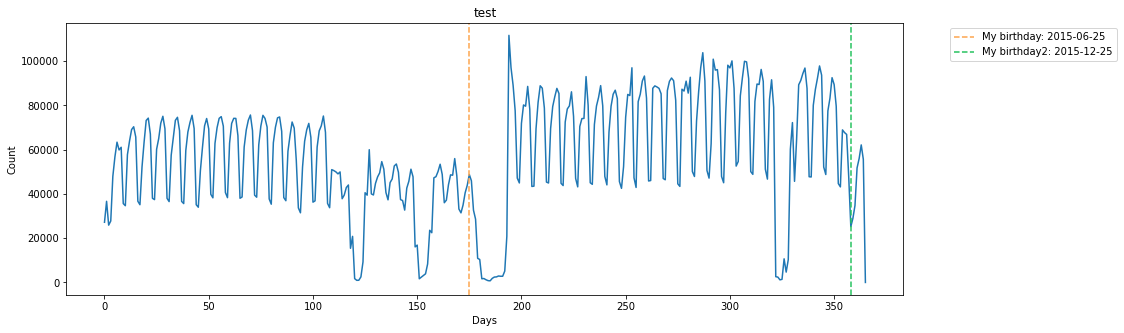

In [14]:
important_dates_dict = {'2015-06-25 15:15:00': 'My birthday', '2015-12-25 15:15:00': 'My birthday2'}
plot_year('2015', dict_years, 'test', important_dates_dict)

Now we plot each year:

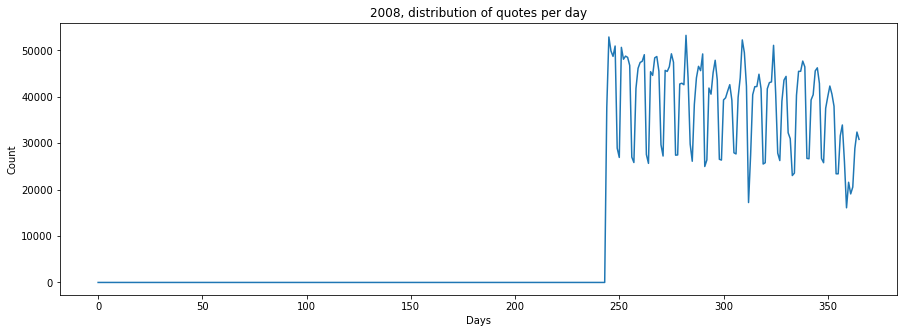

In [15]:
plot_year('2008', dict_years, "2008, distribution of quotes per day", legend = False)

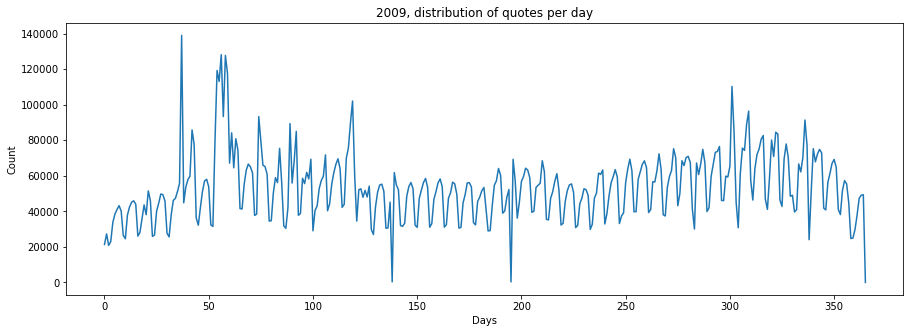

In [16]:
plot_year('2009', dict_years, "2009, distribution of quotes per day", legend = False)

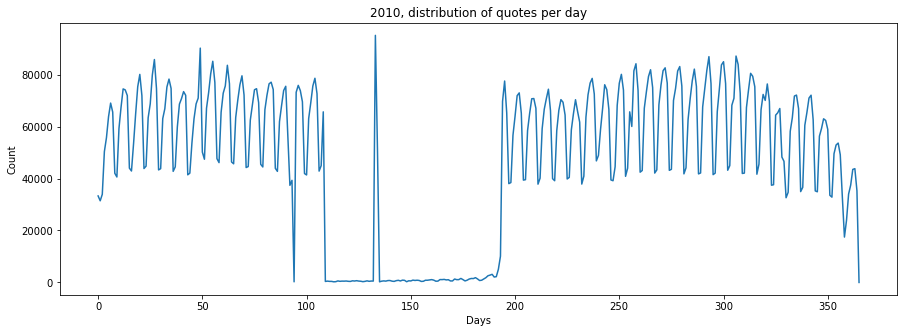

In [17]:
plot_year('2010', dict_years, "2010, distribution of quotes per day", legend = False)

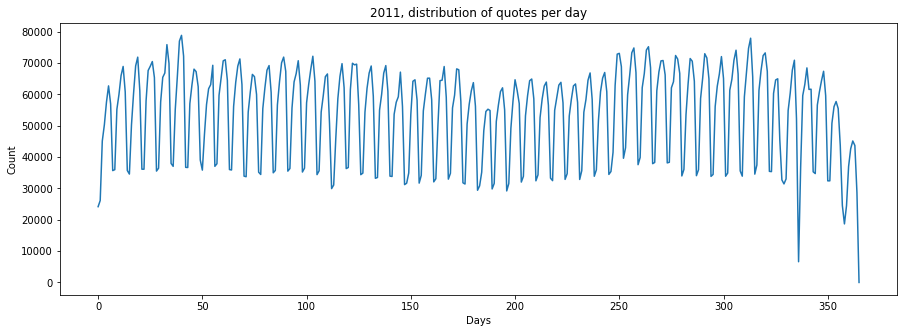

In [18]:
plot_year('2011', dict_years, "2011, distribution of quotes per day", legend = False)

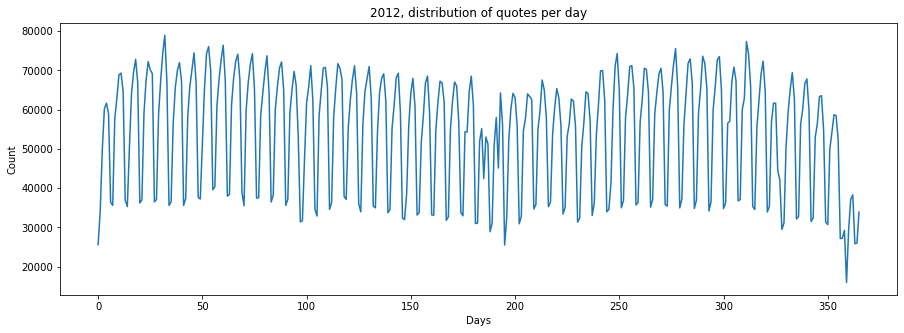

In [19]:
plot_year('2012', dict_years, "2012, distribution of quotes per day", legend = False)

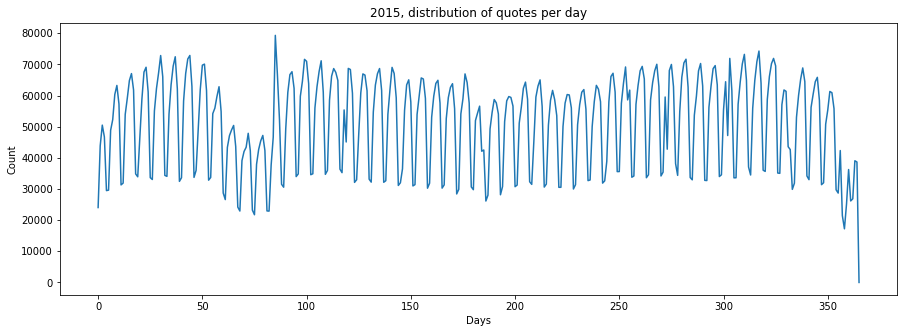

In [20]:
plot_year('2013', dict_years, "2015, distribution of quotes per day", legend = False)

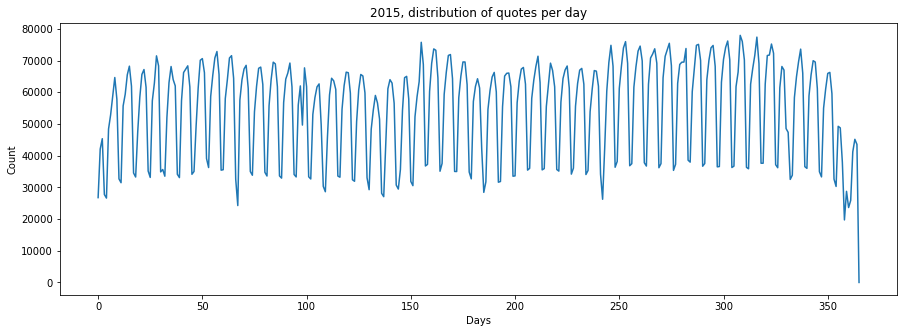

In [21]:
plot_year('2014', dict_years, "2015, distribution of quotes per day", legend = False)

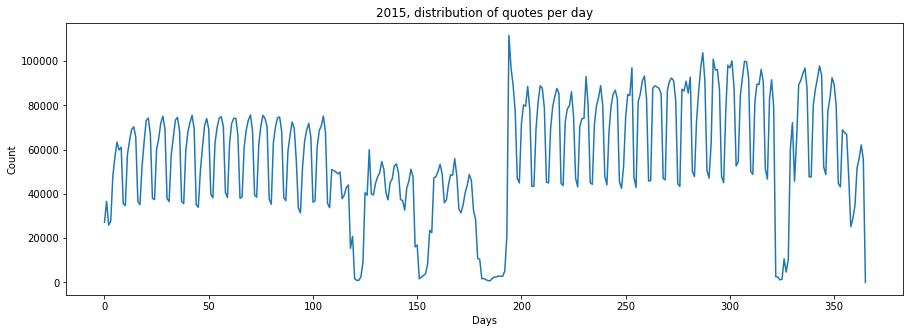

In [22]:
plot_year('2015', dict_years, "2015, distribution of quotes per day", legend = False)

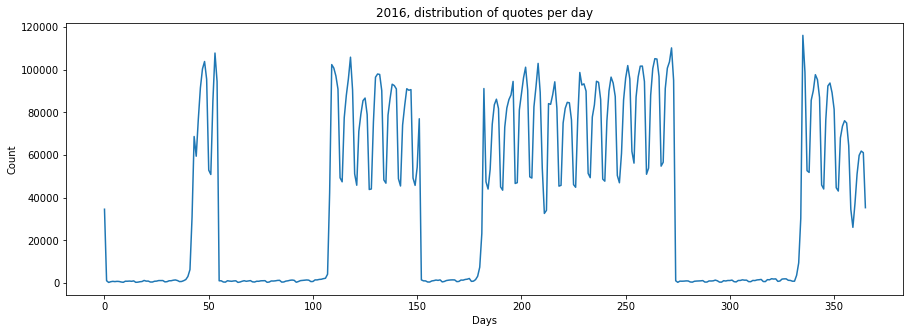

In [23]:
plot_year('2016', dict_years, "2016, distribution of quotes per day", legend = False)

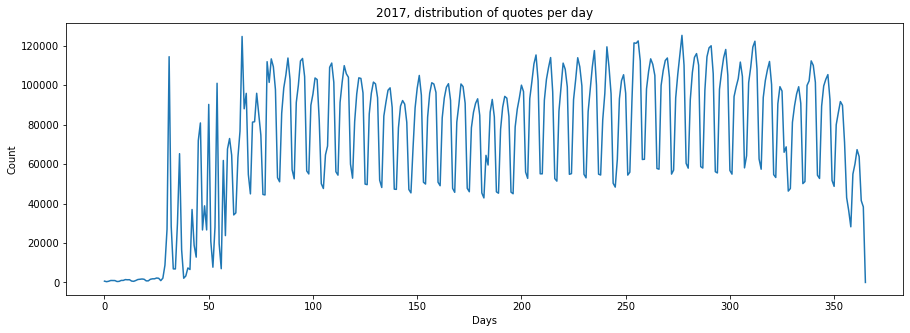

In [24]:
plot_year('2017', dict_years, "2017, distribution of quotes per day", legend = False)

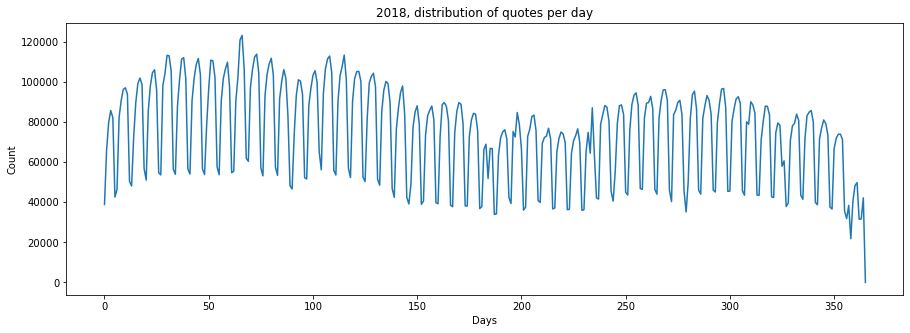

In [25]:
plot_year('2018', dict_years, "2018, distribution of quotes per day", legend = False)

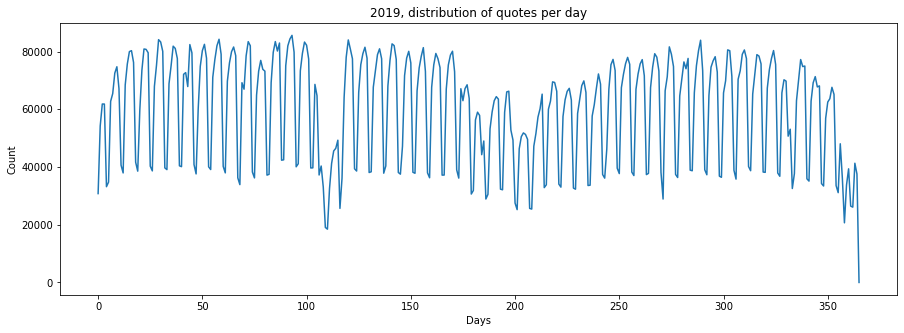

In [26]:
plot_year('2019', dict_years, "2019, distribution of quotes per day", legend = False)

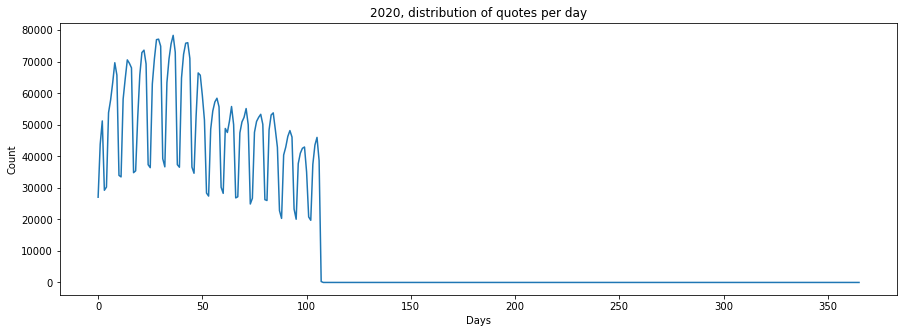

In [27]:
plot_year('2020', dict_years, "2020, distribution of quotes per day", legend = False)

We see there's a particular pattern that appears every years. We suppose it is a weekly behaviour and test this hypothesis:

In [35]:
weeks = np.arange(0,53)
weeks_dict = {}
for w in weeks:
    weeks_dict = {**weeks_dict, 7*w : 'Week {w}'.format(w=w+1)}

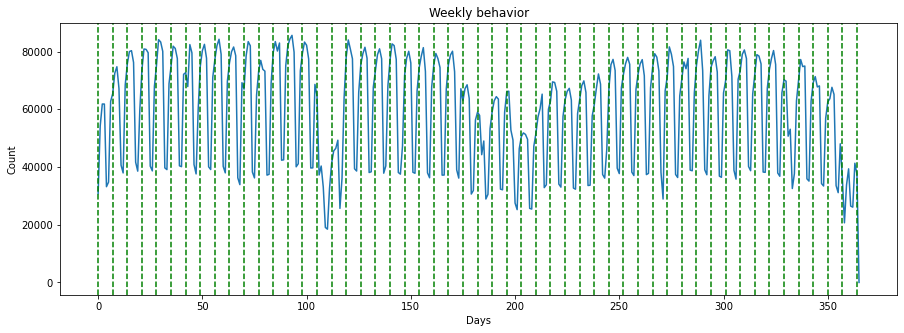

In [41]:
plot_year('2019', dict_years, 'Weekly behavior', weeks_dict, color = 'green', legend = False)

And as we see, our hyptohesis is true. Therefor a new interesting idea would be to group the days per intervalls, e.g every seven days. It is interesting to smooth the function but also if we want to have view per months, weeks, couple days, etc. 

In [42]:
def average_per_interval(count, days_interval):
    count_interval = []
    N_interval = int(len(count)/days_interval)
    
    for i in range(N_interval):
        count_interval.append(np.mean(count[i*days_interval:(i+1)*days_interval]))
    
    return count_interval

In [43]:
def plot_average_interval(year, year_dict, days_interval, title):
    count= year_dict[year]
    count_weekly = average_per_interval(count, days_interval)

    dict_ = {year: count_weekly}

    plot_year(year, dict_, title)

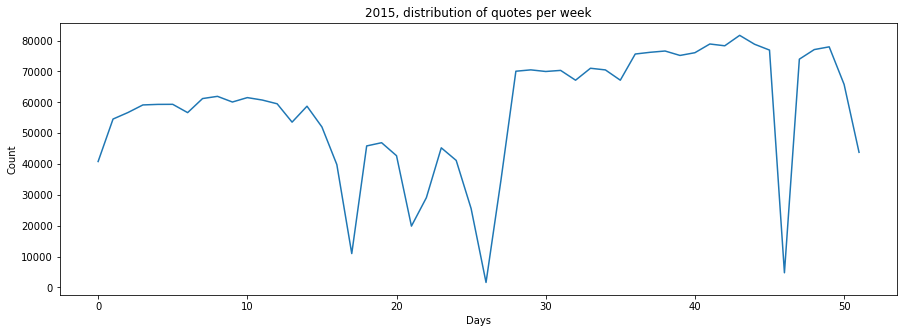

In [44]:
plot_average_interval('2015', dict_years, 7, "2015, distribution of quotes per week")

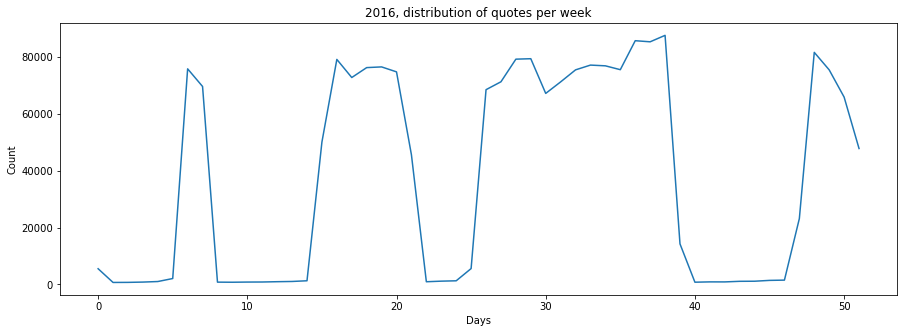

In [45]:
plot_average_interval('2016', dict_years, 7, "2016, distribution of quotes per week")

## Global distribution over the years

Now we want a global view of the distribution, we want to see how the distribution change over the years. To have a nicer graph, we plot it per month.

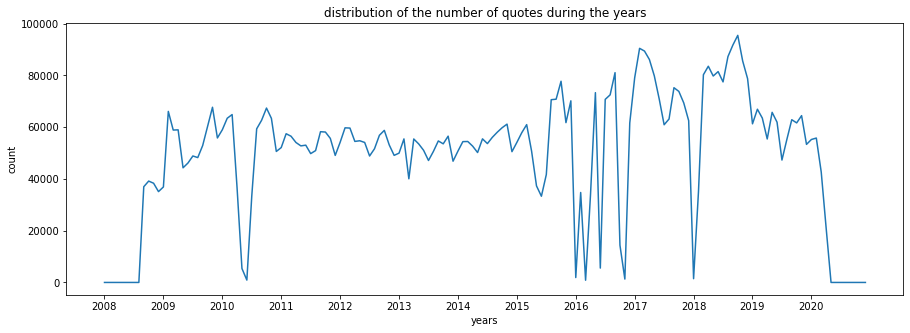

In [46]:

count_normal = []
ticks = [0]
for year, count in dict_years.items():
    avg_count = average_per_interval(count, 30)
    count_normal.extend(avg_count)
    ticks.append(len(count_normal))

months = np.arange((len(count_normal)))


plt.figure(figsize=(15, 5))
plt.plot(months, count_normal)
plt.title("distribution of the number of quotes during the years")
plt.xlabel("years")
plt.ylabel("count")
plt.xticks(ticks[:-1], [2008,2009,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
plt.show()

As expected, the distribution is mostly not uniform. We see a big drops in 2010, 2016 and 2018. As we saw for 2016, the drop is significant enough that it would affect the sentiment analysis. As we have a sparsity problem (~100 quotes/day in the drops and in the tens to hundreds of thousands quotes/day for the "normal" days), the variation in the sentiment analysis may be bigger when there isn't enough quotes. Therefore we have to always look at the years graph to see if the behaviour comes from real sentiment variations over the bigger group or it comes from small number of quotations.